# Análise Exploratória de Dados (EDA)

## Importações e Configurações

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

## Carregando os dados

In [20]:
df = pd.read_parquet(
    os.environ['NOTEBOOKS_PROCESSED_DATA_PATH'] + \
        'creditcard.parquet'
)

print(df.shape)
print(df.size)

(284807, 31)
8829017


In [21]:
df.head()

,Tempo,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Valor,Fraude
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pré processamento

In [22]:
cols_order = df.columns
drop_set = ['Tempo', 'Valor', 'Fraude']

scaler = MinMaxScaler(feature_range=(0,100))

masked_data = df.drop(drop_set, axis=1).values
not_masked_data = df[drop_set].values

df = pd.DataFrame(
    data=scaler.fit_transform(masked_data),
    columns=df.drop(drop_set, axis=1).columns
)

for i, col in enumerate(drop_set):
    df[col] = not_masked_data[:,i]

df = df[cols_order]
df.head()

,Tempo,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Valor,Fraude
0,0.0,93.519234,76.649042,88.136490,31.302266,76.343873,26.766864,26.681518,78.644420,47.531173,51.060048,25.248432,68.090763,37.159060,63.559053,44.608370,43.439239,73.717255,65.506586,59.486323,58.294223,56.118439,52.299212,66.379298,39.125268,58.512179,39.455679,41.897614,31.269663,149.62,0.0
1,0.0,97.854195,77.006665,84.029849,27.179649,76.612034,26.219170,26.487544,78.629835,45.398097,50.526735,38.118772,74.434157,48.619018,64.121901,38.383966,46.410518,72.779398,64.068109,55.193042,57.952975,55.783991,48.023696,66.693782,33.644000,58.729025,44.601297,41.634514,31.342266,2.69,0.0
2,1.0,93.521702,75.311767,86.814082,26.876551,76.232879,28.112212,27.017718,78.804226,41.060274,51.301804,32.242211,70.668336,50.385423,64.047345,51.169695,35.744263,76.338099,64.494538,38.668313,58.585505,56.547733,54.602983,67.893917,28.935386,55.951520,40.272718,41.548927,31.191132,378.66,0.0
3,1.0,94.187802,76.530396,86.848365,21.366122,76.564690,27.555924,26.680306,78.943418,41.499938,50.758505,27.181738,71.091011,48.763473,63.637213,28.912441,41.565341,71.125276,78.849152,46.705759,57.805023,55.973366,51.027701,66.260718,22.382592,61.424540,38.919669,41.766867,31.437103,123.50,0.0
4,2.0,93.861683,77.651979,86.425070,26.979635,76.297509,26.398416,26.896778,78.248351,49.094959,52.430281,23.635461,72.447734,55.250895,60.840590,34.941881,43.499507,72.424251,65.066516,62.606029,58.461528,56.132747,54.727068,66.339224,40.126981,56.634272,50.749681,42.056099,31.748998,69.99,0.0


## Análise preliminar

In [23]:
df.dtypes

Tempo     float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Valor     float64
Fraude    float64
dtype: object

In [24]:
df.describe()

,Tempo,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Valor,Fraude
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,95.829378,76.725837,83.741363,25.193020,76.571630,26.301976,26.535552,78.538548,46.277991,50.872198,28.528563,70.419265,44.833090,64.605314,33.632729,44.935188,73.112974,65.329207,56.331483,58.026532,56.147950,51.003100,66.543361,38.223415,57.790656,42.544834,41.651095,31.312386,88.349619,0.001727
std,47488.145955,3.327582,1.742375,2.627454,6.276426,0.929178,1.339476,0.753651,1.281166,3.784594,2.252790,6.069752,3.766008,7.704098,3.223135,6.842622,2.786624,2.467832,5.764696,6.356960,0.820844,1.184082,3.385397,0.927378,8.161066,2.926065,7.877086,0.745013,0.669840,250.120109,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,94.265777,76.094278,82.198487,21.431070,76.106049,25.529526,26.198002,78.314754,44.062634,49.764423,23.994330,68.890659,39.812956,63.174384,29.275265,43.446756,71.707396,61.898285,52.768179,57.801101,55.779768,48.473036,66.303005,33.445383,56.010441,37.203614,41.520342,31.204915,5.600000,0.000000
50%,84692.000000,95.860142,76.794934,84.053011,25.105042,76.535051,26.026306,26.559983,78.562531,46.100828,50.679956,28.333769,70.947051,44.728064,64.775453,33.992097,45.146393,72.922147,65.304198,56.360649,57.960005,56.100475,51.034737,66.526738,38.775565,57.883799,41.693152,41.653573,31.335204,22.000000,0.000000
75%,139320.500000,98.064490,77.573884,85.521346,28.488189,76.983577,26.702696,26.883067,78.889687,48.335030,51.811349,32.926615,72.749416,49.961328,66.263457,38.483114,46.599353,74.274269,68.773589,59.915485,58.168187,56.448398,53.468802,66.762622,44.146015,59.759310,46.480741,41.819144,31.471241,77.165000,0.000000
max,172792.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,25691.160000,1.000000


In [25]:
df.isnull().sum() / len(df)

Tempo     0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Valor     0.0
Fraude    0.0
dtype: float64

## Análise Exploratória de Dados (EDA)

### Análise univariada

#### Balanceamento das classes

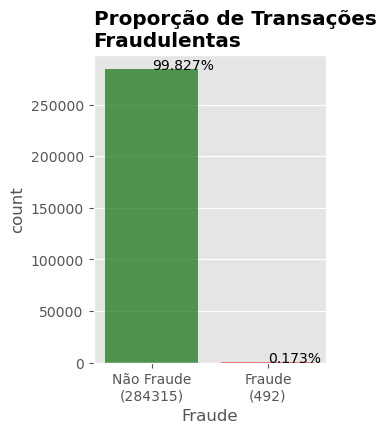

In [39]:
plt.figure(figsize=(3,4));
fraud_count = df['Fraude'].value_counts().values

sns.countplot(
    df['Fraude'].map({
        0: f'Não Fraude\n({fraud_count[0]})',
        1: f'Fraude\n({fraud_count[1]})'
    }),
    palette=['g', 'r'],
    alpha=.7
);

for x, y in enumerate(df['Fraude'].value_counts().values):
    percent = str(round(y / len(df) * 100, 3))
    plt.text(x, y, f'{percent}%');

plt.title(
    label='Proporção de Transações\nFraudulentas',
    fontweight='bold',
    loc='left'
);

### Análise bivariada

### Análise multivariada